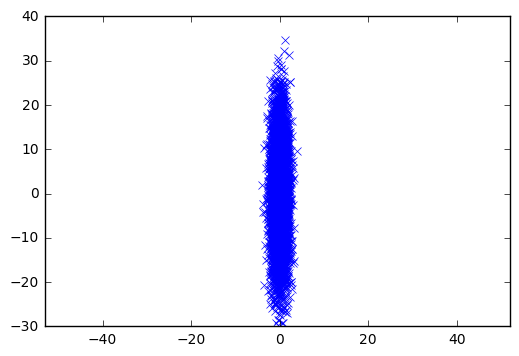

[ 1.   2.5]


In [3]:
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import numpy as np

mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

#Prior=

fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
res = optimize.minimize(fun, (2, 0), method='TNC', tol=1e-10)
print(res.x)
# [ 1.          2.49999999]

0.78966566014 0.535923385544 -0.243628075055 0.874048700895


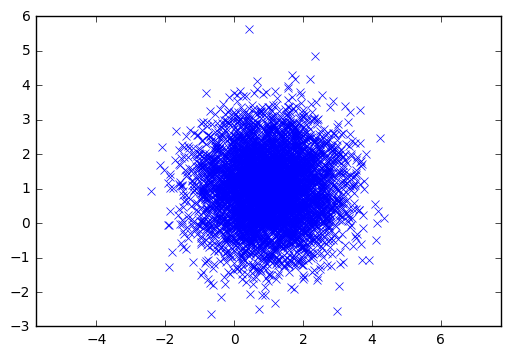

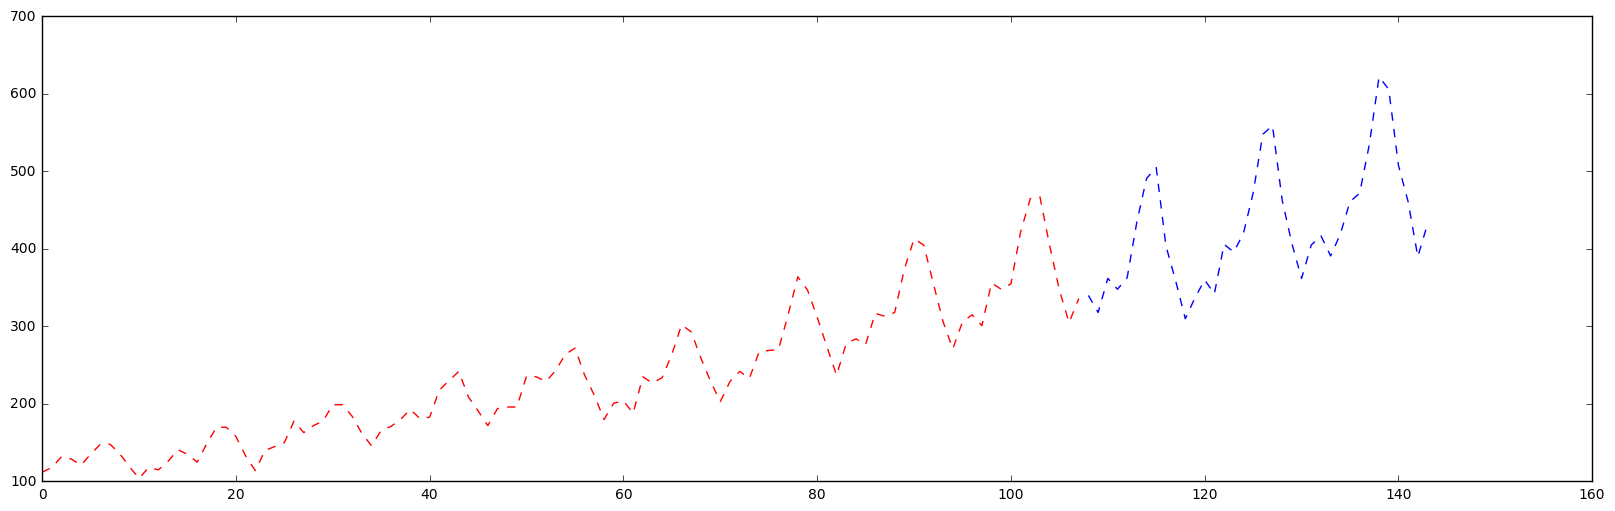

In [9]:
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import numpy as np

u0=0
u1=0
u2=0
u3=0
u4=0
s0=1
s1=1
s2=1
s3=1
s4=1

u_t=[u0,u1,u2,u3,u4]
s_t=[s0,s1,s2,s3,s4]
x=[]
y=[]

text_file = open("DatosT1/datosT1P2.txt", "r")
f=text_file
for line in f:
    a,b=line.split(" ")
    x.append(a)
    y.append(b)

x_e=x[0:int(len(x)*0.75)]
y_e=y[0:int(len(x)*0.75)]
x_v=x[int(len(x)*0.75):len(x)]
y_v=y[int(len(x)*0.75):len(x)]

mean = [1, 1, 0, 0]
cov = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]] 
x, y,v,z = np.random.multivariate_normal(mean, cov, 5000).T
print(x[0],y[0],v[0],z[0])

plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()


fig = plt.figure(figsize=(20,6))
plt.plot(x_e,y_e,'r--')
plt.plot(x_v,y_v,'b--')
plt.show()



#lines = text_file.readlines()
#print (lines)
#print (len(lines))
#text_file.close()

#f = open("datosT1P2.txt\datosT1P2.txt")
#d=f.read()







In [26]:
#help(optimize.minimize)

Help on function find_MAP in module pymc3.tuning.starting:

find_MAP(start=None, vars=None, fmin=None, return_raw=False, model=None, *args, **kwargs)
    Sets state to the local maximum a posteriori point given a model.
    Current default of fmin_Hessian does not deal well with optimizing close
    to sharp edges, especially if they are the minimum.
    
    Parameters
    ----------
    start : `dict` of parameter values (Defaults to `model.test_point`)
    vars : list
        List of variables to set to MAP point (Defaults to all continuous).
    fmin : function
        Optimization algorithm (Defaults to `scipy.optimize.fmin_bfgs` unless
        discrete variables are specified in `vars`, then
        `scipy.optimize.fmin_powell` which will perform better).
    return_raw : Bool
        Whether to return extra value returned by fmin (Defaults to `False`)
    model : Model (optional if in `with` context)
    *args, **kwargs
        Extra args passed to fmin



In [4]:
import matplotlib.pyplot as plt
from pymc3 import Model, Normal, HalfNormal
from pymc3 import find_MAP
import scipy.optimize as optimize
import numpy as np
from scipy import optimize

## A
#Cargar los datos
x=[]
y=[]
text_file = open("datosT1P2.txt", "r")
f=text_file
for line in f:
    a,b=line.split(" ")
    x.append(np.int(np.float(a)))
    y.append(np.int(np.float(b)))

x_e=np.array(x[0:int(len(x)*0.75)])
y_e=np.array(y[0:int(len(x)*0.75)])
x_v=np.array(x[int(len(x)*0.75):len(x)])
y_v=np.array(y[int(len(x)*0.75):len(x)])

print(x_e)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]


Optimization terminated successfully.
         Current function value: 815.442830
         Iterations: 64
         Function evaluations: 70
         Gradient evaluations: 70
[  8.20609725e+01   3.98988222e+00  -4.10962762e-02   2.93086998e-04]


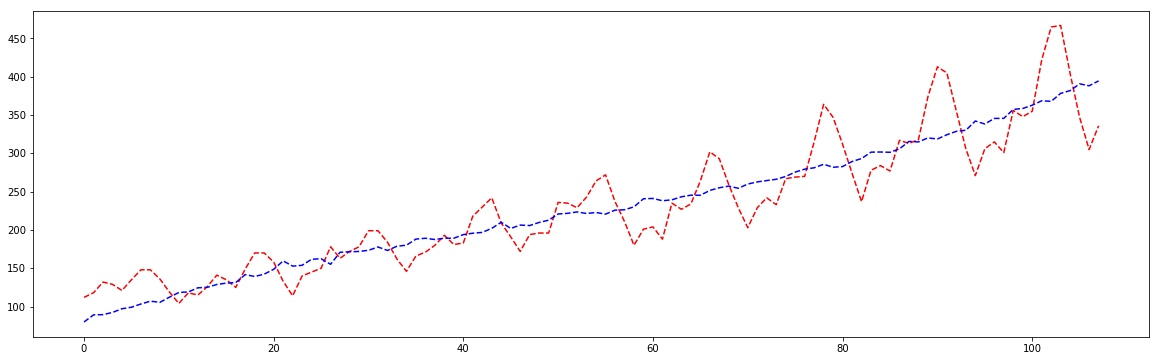

In [5]:
#Simular Variable de salida

basic_model_g = Model()

with basic_model_g:

#Priori de los parámetros
    sigma_n= HalfNormal('sigma', sd=1)
    theta= Normal('theta', mu=0, sd=10,shape=4)


#Valor esperado de la salida
    f_t=theta[0]+theta[1]*x_e+theta[2]*np.power(x_e,2)+theta[3]*np.power(x_e,3)
#Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=f_t, sd=sigma_n, observed=y_e)
    
    map_estimate=find_MAP(model=basic_model_g)

theta_p=map_estimate['theta']
sigma_p=map_estimate['sigma_log_']
print(theta_p)
f_pool=theta_p[0]+np.dot(theta_p[1],x_e)+np.dot(theta_p[2],np.power(x_e,2))+np.dot(theta_p[3],np.power(x_e,3))
y_pool=np.dot(np.random.randn(len(f_pool)),sigma_p)+f_pool

fig = plt.figure(figsize=(20,6))
plt.plot(x_e,y_e,'r--')
plt.plot(x_e,y_pool,'b--')
plt.show()





         Current function value: 44721.983814
         Iterations: 25
         Function evaluations: 1082
         Gradient evaluations: 178
[  1.18139594e+01   1.00010135e+02   7.96980821e+01   1.75596657e-02]


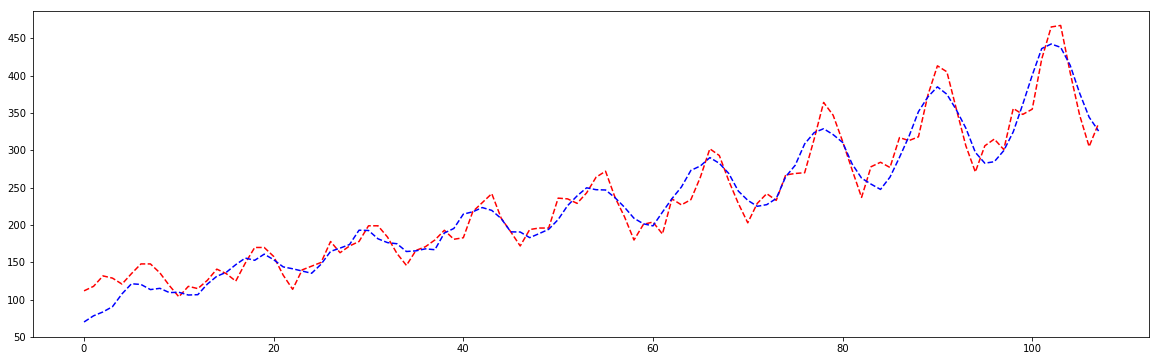

In [3]:
# from scipy import optimize
##b
def f(theta_b):   
    return sum(((y_e)-(f_pool+theta_b[0]*np.sin(theta_b[1]*x_e+theta_b[2])*np.exp(x_e*theta_b[3])))**2)

optimize_b=optimize.fmin_bfgs(f, [4,100,80,0.01],maxiter=1000)
print(optimize_b)

theta_b=optimize_b
f_b=f_pool+theta_b[0]*np.sin(theta_b[1]*x_e+theta_b[2])*np.exp(x_e*theta_b[3])
y_pool=np.dot(np.random.randn(len(f_b)),sigma_p)+f_b

fig = plt.figure(figsize=(20,6))
plt.plot(x_e,y_e,'r--')
plt.plot(x_e,y_pool,'b--')
plt.show()



In [34]:
https://peerj.com/articles/cs-55/#p-9

SyntaxError: invalid syntax (<ipython-input-34-74e35a01075d>, line 1)

0.001
1


/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


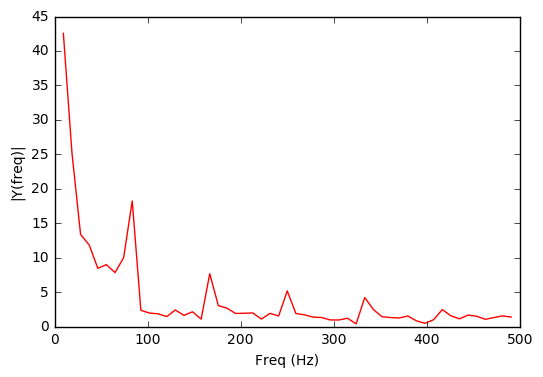

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336]
108


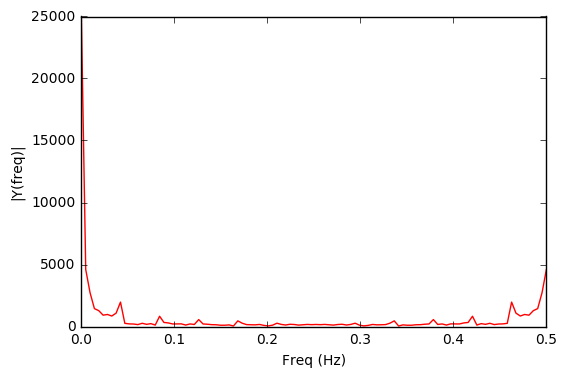

In [58]:
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange

def plotSpectrum(y,Fs):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t)
 """
 n = len(y) # length of the signal
 k = arange(n)
 T = n/Fs
 frq = k/T # two sides frequency range
 frq = frq[1:n/2] # one side frequency range

 Y = fft(y)/n # fft computing and normalization
 Y = Y[1:n/2]
 
 plot(frq,abs(Y),'r') # plotting the spectrum
 xlabel('Freq (Hz)')
 ylabel('|Y(freq)|')

Fs = 1000;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = arange(0,1,Ts) # time vector
print(Ts)

print(dt)
plotSpectrum(y,Fs)

show()

dt=x_e[1]-x_e[0]
Fs=1/dt
df=Fs/len(x_e)
freq=np.linspace(0,Fs/2,len(x_e))
print(y_e)
Y=fft(y_e)
print(len(Y))
plot(freq,abs(Y),'r') # plotting the spectrum
xlabel('Freq (Hz)')
ylabel('|Y(freq)|')
show()




In [ ]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = y_e
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()